# Prédiction des Fraudes aux *Enchères*

Sur un site de ventes aux enchères en ligne, les enchérisseurs humains sont de plus en plus découragés face à leur incapacité à remporter des enchères contre des concurrents contrôlés par des logiciels. Cette situation entraîne une baisse significative de l'activité des clients principaux du site. Pour restaurer la satisfaction de leur clientèle, les propriétaires du site doivent éliminer les offres générées par ordinateur de leurs enchères.

L'objectif de ce projet est de détecter les offres faites par des "robots" lors des enchères en ligne, permettant ainsi aux propriétaires du site de repérer et d'exclure ces utilisateurs, pour garantir une activité d'enchères équitable

**<h1>1. Analyse Exploratoire des Données</h1>**

<h2>A. Présentation des données :</h2>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importation de bibliothéques
import pandas as pd

**Descriptions des fichiers:**

- **train.csv** - ensemble de données d'entraînement issu de l'ensemble des enchérisseurs
- **test.csv** - ensemble de données de test issu de l'ensemble des enchérisseurs
- **bids.csv** - ensemble de données des enchères

In [ ]:
# Charger les ensembles de données
bids=pd.read_csv("/content/drive/MyDrive/Projet ML/bids.csv", sep=',')
test=pd.read_csv("/content/drive/MyDrive/Projet ML/test.csv", sep=',')
train=pd.read_csv("/content/drive/MyDrive/Projet ML/train.csv", sep=',')

Pour l'ensemble de données bids.csv:


In [ ]:
#Affichage des colonnes de base de données bids
bids.columns

Index(['bid_id', 'bidder_id', 'auction', 'merchandise', 'device', 'time',
       'country', 'ip', 'url'],
      dtype='object')

- **bid_id** - identifiant unique pour cette offre
- **bidder_id** - Identifiant unique d'un enchérisseur
- **auction** - Identifiant unique d'une enchère
- **merchandise** - La catégorie de la campagne du site d'enchères, ce qui signifie que l'enchérisseur est peut-être venu sur ce site en cherchant des "articles pour la maison" mais a fini par enchérir pour des "articles de sport" - et cela conduit à ce que ce champ soit "articles pour la maison". Ce champ catégoriel pourrait être un terme de recherche ou une publicité en ligne.
- **device** - Modèle de téléphone d'un visiteur
- **time** - Heure à laquelle l'offre est faite (transformée pour protéger la vie privée).
- **country** - Le pays auquel appartient l'IP
- **ip** - Adresse IP d'un enchérisseur (obfusquée pour protéger la vie privée).
- **url** - url d'où l'enchérisseur a été référé (obfusquée pour protéger la vie privée).

Pour l'ensemble de données train.csv:


In [ ]:
# Afficher les titres de columns
train.columns

Index(['bidder_id', 'payment_account', 'address', 'outcome'], dtype='object')

- **bidder_id** – Identifiant unique d'un enchérisseur.
- **payment_account** – Compte de paiement associé à un enchérisseur (transformée pour protéger la vie privée).
- **address** – Adresse postale d'un enchérisseur (transformée pour protéger la vie privée).
- **outcome** – Étiquette d'un enchérisseur indiquant s'il s'agit ou non d'un robot. La valeur 1.0 indique un robot, tandis que la valeur 0.0 indique un être humain.

In [ ]:
#Afiichage des cinq premieres lignes de base de données bids
bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


# Aperçu des données de test

Voici les premières lignes du jeu de données de test :

In [ ]:
#Affichage des premieres lignes de base de données train
train.head()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


Toutes les variables sauf 'outcome' sont obscurcies pour protéger la vie privée.

# Aperçu des données d'enchères


Voici les premières lignes du jeu de données d'enchères :



In [ ]:
#Affichage des prémieres données de base de données bids
bids

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3
...,...,...,...,...,...,...,...,...,...
7656329,7656329,626159dd6f2228ede002d9f9340f75b7puk8d,3e64w,jewelry,phone91,9709222052631578,ru,140.204.227.63,cghhmomsaxi6pug
7656330,7656330,a318ea333ceee1ba39a494476386136a826dv,xn0y0,mobile,phone236,9709222052631578,pl,24.232.159.118,wgggpdg2gx5pesn
7656331,7656331,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,gja6c,sporting goods,phone80,9709222052631578,za,80.237.28.246,5xgysg14grlersa
7656332,7656332,d4bd412590f5106b9d887a43c51b254eldo4f,hmwk8,jewelry,phone349,9709222052631578,my,91.162.27.152,bhtrek44bzi2wfl


Ce tableau montre qu'il ya 7 656 334 lignes et 9 colonnes dans le jeu de données d'enchères.

In [ ]:
print("Nombre des soumissionnaires 'bidders' dans la base de données bids.csv : ",bids['bidder_id'].nunique())
print("Nombre des soumissionnaires 'bidders' dans la base de données train.csv : ",train['bidder_id'].nunique())

Nombre des soumissionnaires 'bidders' dans la base de données bids.csv :  6614
Nombre des soumissionnaires 'bidders' dans la base de données train.csv :  2013


In [ ]:
print("les élements nul dans la base de données bids.csv : \n", bids.isnull().sum().sort_values())
print("les élements nul dans la base de données train.csv : \n", train.isnull().sum().sort_values())
print("les élements nul dans la base de données test.csv : \n", test.isnull().sum().sort_values())


les élements nul dans la base de données bids.csv : 
 bid_id            0
bidder_id         0
auction           0
merchandise       0
device            0
time              0
ip                0
url               0
country        8859
dtype: int64
les élements nul dans la base de données train.csv : 
 bidder_id          0
payment_account    0
address            0
outcome            0
dtype: int64
les élements nul dans la base de données test.csv : 
 ID_code    0
var_126    0
var_127    0
var_128    0
var_129    0
          ..
var_69     0
var_70     0
var_71     0
var_61     0
var_199    0
Length: 201, dtype: int64


In [ ]:
print("Des informations sur la base de données bids.csv :")
bids.info()
print("Des informations sur la base de données train.csv :")
train.info()
print("Des informations sur la base de données test.csv :")
test.info()

Des informations sur la base de données bids.csv :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656334 entries, 0 to 7656333
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   bid_id       int64 
 1   bidder_id    object
 2   auction      object
 3   merchandise  object
 4   device       object
 5   time         int64 
 6   country      object
 7   ip           object
 8   url          object
dtypes: int64(2), object(7)
memory usage: 525.7+ MB
Des informations sur la base de données train.csv :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bidder_id        2013 non-null   object 
 1   payment_account  2013 non-null   object 
 2   address          2013 non-null   object 
 3   outcome          2013 non-null   float64
dtypes: float64(1), object(3)
memory usage: 63.0+ KB
Des informations sur la

<h2>B. Statistiques Descriptives</h2>

### Aperçu Quantitatif
Le script suivant imprime des statistiques essentielles extraites de `bids.csv`, offrant un aperçu quantitatif des enchères. Ces statistiques initiales sont cruciales pour comprendre l’étendue et la diversité des interactions dans les données d’enchères.

In [ ]:
print("Nombre de bids dans bids.csv :",bids['bid_id'].nunique())
print("Nombre de merchandise dans bids.csv :",bids['merchandise'].nunique())
print("Nombre de merchandise dans bids.csv :",bids['merchandise'].nunique())
print("Nombre de device dans bids.csv :",bids['device'].nunique())
print("Nombre d'adresse ip dans bids.csv :",bids['ip'].nunique())
print("Nombre de pays dans bids.csv :",bids['country'].nunique())

Nombre de bids dans bids.csv : 7656334
Nombre de merchandise dans bids.csv : 10
Nombre de merchandise dans bids.csv : 10
Nombre de device dans bids.csv : 7351
Nombre d'adresse ip dans bids.csv : 2303991
Nombre de pays dans bids.csv : 199


### Préparation des Données pour Analyses Avancées
Ensuite, on procède à une jointure des ensembles de données `train` et `bids` via `pd.merge`. Cette étape est fondamentale pour enrichir les caractéristiques du modèle en intégrant les comportements d’enchères au profil des soumissionnaires.

In [ ]:
#Jointure des base de données bids et train
data = pd.merge(train, bids, on='bidder_id', how='inner')
data

,bidder_id,payment_account,address,outcome,bid_id,auction,merchandise,device,time,country,ip,url
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,85371,yitr4,home goods,phone35,9759489368421052,ke,82.34.177.248,vasstdc27m7nks3
1,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,274487,btpyy,home goods,phone1004,9760248684210526,zm,202.130.71.167,vasstdc27m7nks3
2,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,527436,kj2ko,home goods,phone4,9762260578947368,ke,22.54.76.225,vasstdc27m7nks3
3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,554135,1m5t8,home goods,phone4,9762430736842105,ke,32.13.237.126,vasstdc27m7nks3
4,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,607628,btpyy,home goods,phone4,9762789000000000,ke,202.236.188.240,vasstdc27m7nks3
...,...,...,...,...,...,...,...,...,...,...,...,...
3071219,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,0.0,609792,jefix,mobile,phone316,9762802052631578,id,28.18.7.49,ar89au37swuzvzz
3071220,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,0.0,2297899,jefix,mobile,phone33,9772600526315789,id,161.237.171.157,ar89au37swuzvzz
3071221,0381a69b7a061e9ace2798fd48f1f537mgq57,fd87037ce0304077079c749f420f0b4c54uo0,f030a221726fbcdfc4dc7dfd1b381a112hieq,0.0,3400601,jqx39,office equipment,phone11,9636754421052631,sa,54.212.21.87,cgb17jpn1ixq9hw
3071222,84a769adc98498f52debfe57b93a0789556f4,fbe0ce34d6546ebd9e4c63afc68b085byd2tf,a3d2de7675556553a5f08e4c88d2c228fib6p,0.0,2007255,ntjde,jewelry,phone59,9770756157894736,ru,79.72.96.0,9ov8hm82p20sxlz


### Vérification de l’intégrité des données
Avant de plonger dans l’analyse approfondie, il est essentiel d’examiner la structure et la complétude des données.

In [ ]:
#Pour savoir des informations sur notre base de données
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3071224 entries, 0 to 3071223
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   bidder_id        object 
 1   payment_account  object 
 2   address          object 
 3   outcome          float64
 4   bid_id           int64  
 5   auction          object 
 6   merchandise      object 
 7   device           object 
 8   time             int64  
 9   country          object 
 10  ip               object 
 11  url              object 
dtypes: float64(1), int64(2), object(9)
memory usage: 304.6+ MB
None
bidder_id             0
payment_account       0
address               0
outcome               0
bid_id                0
auction               0
merchandise           0
device                0
time                  0
country            2701
ip                    0
url                   0
dtype: int64


On remarque qu'il y a 2701 valeurs nul de variables country

### Analyse Statistique Descriptive
L’exécution de `data.describe()` génère des statistiques descriptives qui résumé la tendance centrale, la dispersion et la forme de la distribution d’un ensemble de données, excluant les valeurs NaN.

In [ ]:
print(data.describe())

            outcome        bid_id          time
count  3.071224e+06  3.071224e+06  3.071224e+06
mean   1.342839e-01  3.838444e+06  9.696606e+15
std    3.409572e-01  2.191845e+06  5.256340e+13
min    0.000000e+00  1.000000e+00  9.631917e+15
25%    0.000000e+00  1.946030e+06  9.640958e+15
50%    0.000000e+00  3.836413e+06  9.700339e+15
75%    0.000000e+00  5.707636e+06  9.761303e+15
max    1.000000e+00  7.656331e+06  9.772885e+15


In [ ]:
print("Nombre de bids dans la nouvelle base de donées:",data['bid_id'].nunique())
print("Nombre des bidders dans la nouvelle base de donées :",data['bidder_id'].nunique())
print("Nombre de merchandise dans la nouvelle base de donées :",data['merchandise'].nunique())
print("Nombre de device dans la nouvelle base de donées :",data['device'].nunique())
print("Nombre d'adresse ip dans la nouvelle base de donées :",data['ip'].nunique())
print("Nombre de pays dans la nouvelle base de donées :",data['country'].nunique())
print("Nombre des echéres dans la nouvelle base de donées :",data['auction'].nunique())
print("Nombre des comptes de paiments dans la nouvelle base de donées :",data['payment_account'].nunique())
print("Nombre des adresses dans la nouvelle base de donées :",data['address'].nunique())

Nombre de bids dans la nouvelle base de donées: 3071224
Nombre des bidders dans la nouvelle base de donées : 1984
Nombre de merchandise dans la nouvelle base de donées : 10
Nombre de device dans la nouvelle base de donées : 5729
Nombre d'adresse ip dans la nouvelle base de donées : 1030950
Nombre de pays dans la nouvelle base de donées : 198
Nombre des echéres dans la nouvelle base de donées : 12740
Nombre des comptes de paiments dans la nouvelle base de donées : 1984
Nombre des adresses dans la nouvelle base de donées : 1984


In [ ]:
grouped_data = data.groupby('outcome')
# Calculer les statistiques pour chaque groupe
print("Statistiques pour chaque catégorie d'outcome:\n")
for variable in ['bid_id', 'bidder_id', 'merchandise', 'device', 'ip', 'country', 'auction', 'payment_account', 'address']:
    print(f"Nombre de {variable} uniques pour chaque catégorie d'outcome:")
    print(grouped_data[variable].nunique())
    print()


Statistiques pour chaque catégorie d'outcome:

Nombre de bid_id uniques pour chaque catégorie d'outcome:
outcome
0.0    2658808
1.0     412416
Name: bid_id, dtype: int64

Nombre de bidder_id uniques pour chaque catégorie d'outcome:
outcome
0.0    1881
1.0     103
Name: bidder_id, dtype: int64

Nombre de merchandise uniques pour chaque catégorie d'outcome:
outcome
0.0    10
1.0     7
Name: merchandise, dtype: int64

Nombre de device uniques pour chaque catégorie d'outcome:
outcome
0.0    5153
1.0    3078
Name: device, dtype: int64

Nombre de ip uniques pour chaque catégorie d'outcome:
outcome
0.0    835449
1.0    230125
Name: ip, dtype: int64

Nombre de country uniques pour chaque catégorie d'outcome:
outcome
0.0    191
1.0    191
Name: country, dtype: int64

Nombre de auction uniques pour chaque catégorie d'outcome:
outcome
0.0    12231
1.0     6390
Name: auction, dtype: int64

Nombre de payment_account uniques pour chaque catégorie d'outcome:
outcome
0.0    1881
1.0     103
Name: paym

In [ ]:
# Liste des variables pour lesquelles calculer la moyenne du nombre de valeurs uniques
variables_to_analyze = ['bid_id', 'device', 'ip', 'country', 'auction']
mean_values_per_outcome = pd.DataFrame()
# Calculer la moyenne du nombre de valeurs uniques pour chaque variable et chaque catégorie d'outcome
for var in variables_to_analyze:
    unique_counts_per_user = data.groupby(['bidder_id', 'outcome'])[var].nunique().reset_index()
    mean_unique_counts = unique_counts_per_user.groupby('outcome')[var].mean()
    mean_values_per_outcome[var] = mean_unique_counts
# Afficher les résultats
print("Nombre moyen de valeurs uniques pour chaque catégorie d'outcome:\n")
print(mean_values_per_outcome)


Nombre moyen de valeurs uniques pour chaque catégorie d'outcome:

              bid_id      device           ip    country     auction
outcome                                                             
0.0      1413.507709   73.947368   581.256247  12.587453   58.070707
1.0      4004.038835  163.611650  2387.796117  26.320388  145.038835


On remarque que les robots ont des valeurs uniques pour chaque variables plus que les humains, ceci peut nous donner des idées  sur les paterns humain et les paterns des robots

In [ ]:
print("Nombre des bidders humain dans la nouvelle base de donées :",data[data['outcome'] == 0.0]['bidder_id'].nunique())
print("Nombre des bidders robot dans la nouvelle base de donées :", data[data['outcome'] == 1.0]['bidder_id'].nunique())

Nombre des bidders humain dans la nouvelle base de donées : 1881
Nombre des bidders robot dans la nouvelle base de donées : 103


In [ ]:
print("Nombre des bids effectué par un humain dans la nouvelle base de donées :",data[data['outcome'] == 0.0]['bid_id'].nunique())
print("Nombre des bids effectué par un robot dans la nouvelle base de donées :", data[data['outcome'] == 1.0]['bid_id'].nunique())

Nombre des bids effectué par un humain dans la nouvelle base de donées : 2658808
Nombre des bids effectué par un robot dans la nouvelle base de donées : 412416


In [ ]:
# Définir les noms et les colonnes pour les statistiques
notation = [('enchéres', 'bid_id'), ('auctions', 'auction'), ('pays', 'country'),
            ('IPs', 'ip'), ('devices', 'device'), ('urls', 'url')]
# Séparer les données en fonction de 'outcome'
data_outcome_0 = data[data['outcome'] == 0]
data_outcome_1 = data[data['outcome'] == 1]
# Fonction pour calculer les statistiques
def calculer_statistiques(data, group_var, notation):
    data_gr = data.groupby([group_var])
    statistiques = {}
    for name, column in notation:
        stats = data_gr[column].nunique()
        statistiques[column] = stats
        print(f"Moyenne des {name} par utilisateur: {stats.mean():.2f}\n"
              f"Médiane des {name} par utilisateur: {stats.median()}\n"
              f"Mode des {name} par utilisateur: {stats.mode()[0]}\n"
              f"Utilisateur avec le plus de {name}: {stats.max()}\n"
              f"Utilisateur avec le moins de {name}: {stats.min()}\n")

# Calculer les statistiques pour outcome == 0
print("Statistiques pour les humains == 0:\n")
calculer_statistiques(data_outcome_0, 'bidder_id', notation)

# Calculer les statistiques pour outcome == 1
print("\nStatistiques pour les robots == 1:\n")
calculer_statistiques(data_outcome_1, 'bidder_id', notation)


Statistiques pour les humains == 0:

Moyenne des enchéres par utilisateur: 1413.51
Médiane des enchéres par utilisateur: 14.0
Mode des enchéres par utilisateur: 1
Utilisateur avec le plus de enchéres: 515033
Utilisateur avec le moins de enchéres: 1

Moyenne des auctions par utilisateur: 58.07
Médiane des auctions par utilisateur: 9.0
Mode des auctions par utilisateur: 1
Utilisateur avec le plus de auctions: 1623
Utilisateur avec le moins de auctions: 1

Moyenne des pays par utilisateur: 12.59
Médiane des pays par utilisateur: 3.0
Mode des pays par utilisateur: 1
Utilisateur avec le plus de pays: 163
Utilisateur avec le moins de pays: 0

Moyenne des IPs par utilisateur: 581.26
Médiane des IPs par utilisateur: 11.0
Mode des IPs par utilisateur: 1
Utilisateur avec le plus de IPs: 109159
Utilisateur avec le moins de IPs: 1

Moyenne des devices par utilisateur: 73.95
Médiane des devices par utilisateur: 8.0
Mode des devices par utilisateur: 1
Utilisateur avec le plus de devices: 2618
Utilis

<h2>C. Visualisations :</h2>

In [ ]:
#importation des bibliothéques
import matplotlib.pyplot as plt
import seaborn as sns

## Distribution de la variable ‘merchandise’

Ce graphique représente la distribution des différentes catégories de marchandise. Il est réalisé avec un countplot, ce qui permet de compter le nombre d’occurrences pour chaque catégorie unique dans le jeu de données.



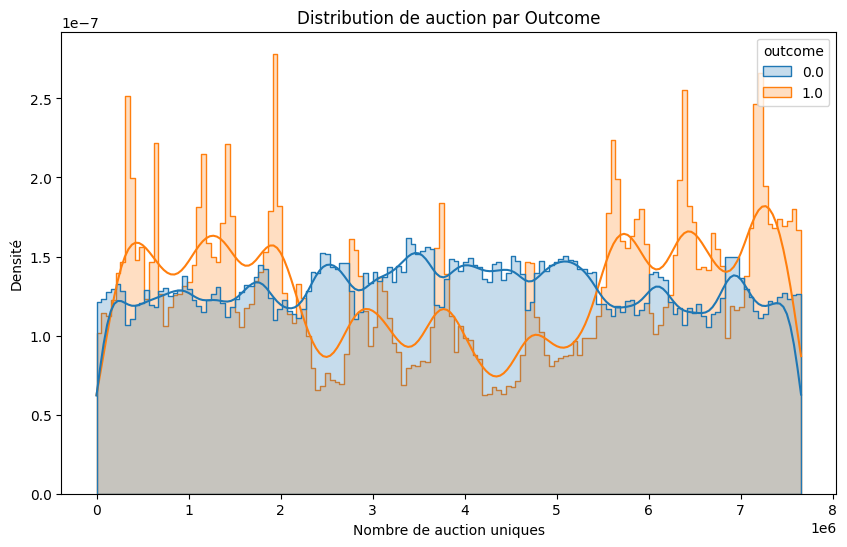

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data, x='bid_id', hue='outcome', kde=True, element="step", stat="density", common_norm=False)
plt.title(f'Distribution de {var} par Outcome')
plt.xlabel(f'Nombre de {var} uniques')
plt.ylabel('Densité')
plt.show()

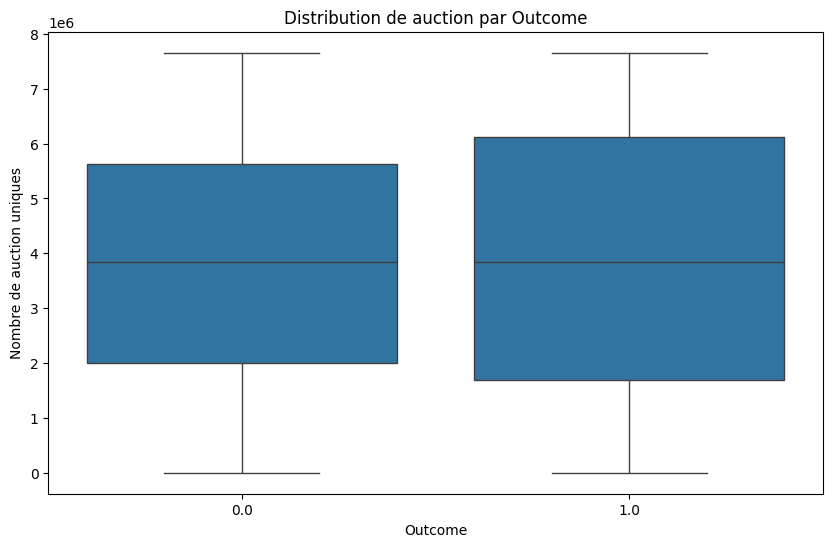

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='outcome', y='bid_id', data=data)
plt.title(f'Distribution de {var} par Outcome')
plt.xlabel('Outcome')
plt.ylabel(f'Nombre de {var} uniques')
plt.show()

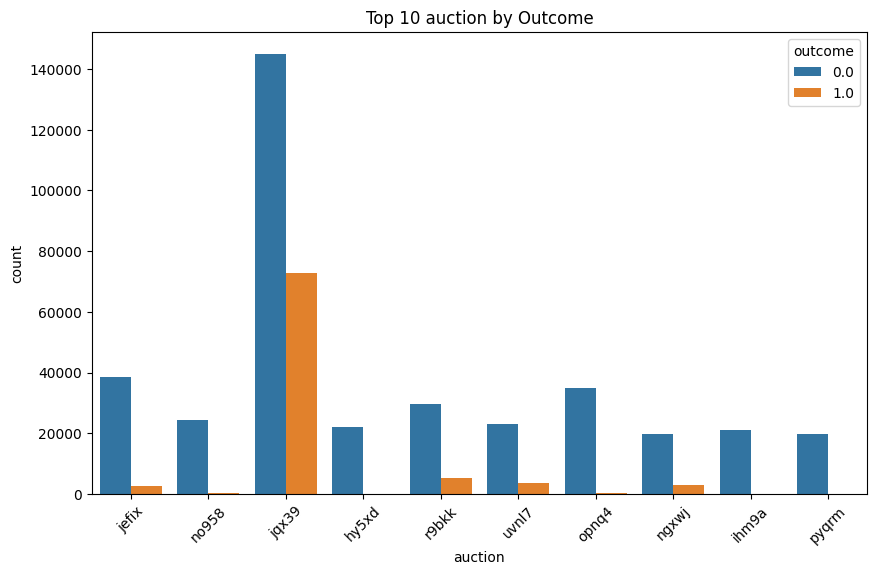

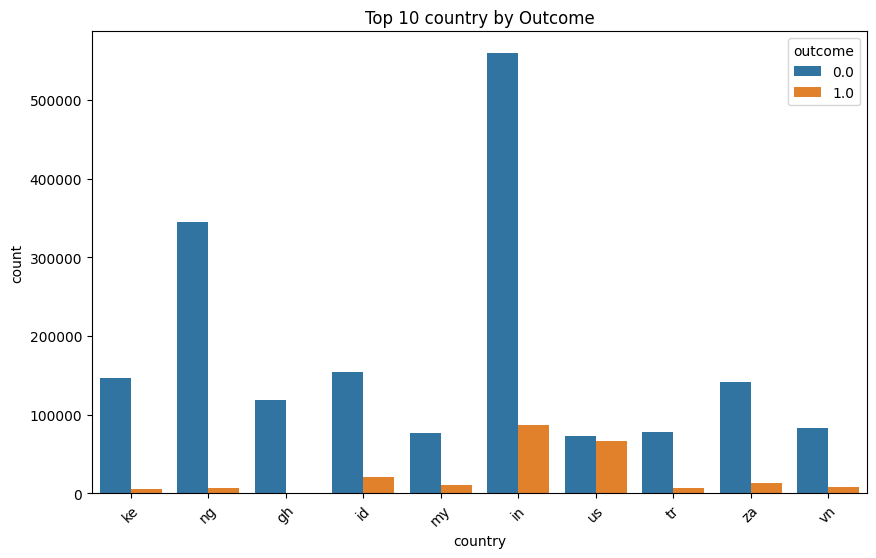

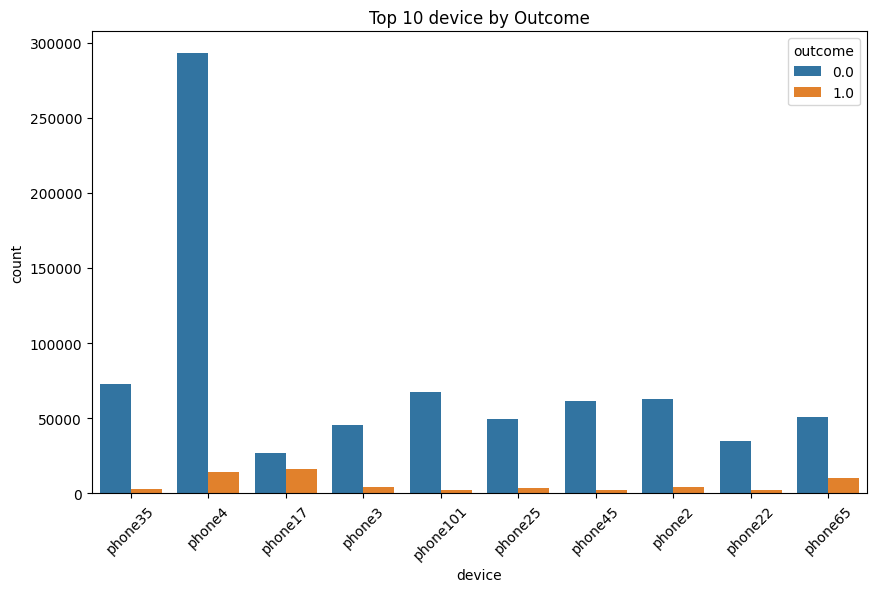

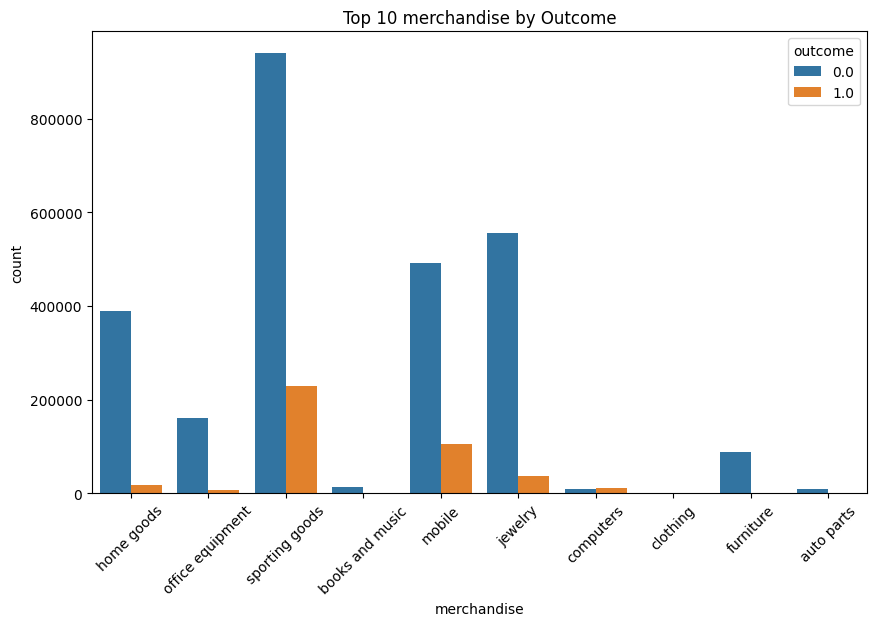

In [ ]:
top_n = 10
categorical_variables = ['auction', 'country', 'device', 'merchandise']
for var in categorical_variables:
    top_categories = data[var].value_counts().index[:top_n]
    filtered_data = data[data[var].isin(top_categories)]

    plt.figure(figsize=(10, 6))
    sns.countplot(x=var, hue='outcome', data=filtered_data)
    plt.title(f'Top {top_n} {var} by Outcome')
    plt.xticks(rotation=45)
    plt.show()

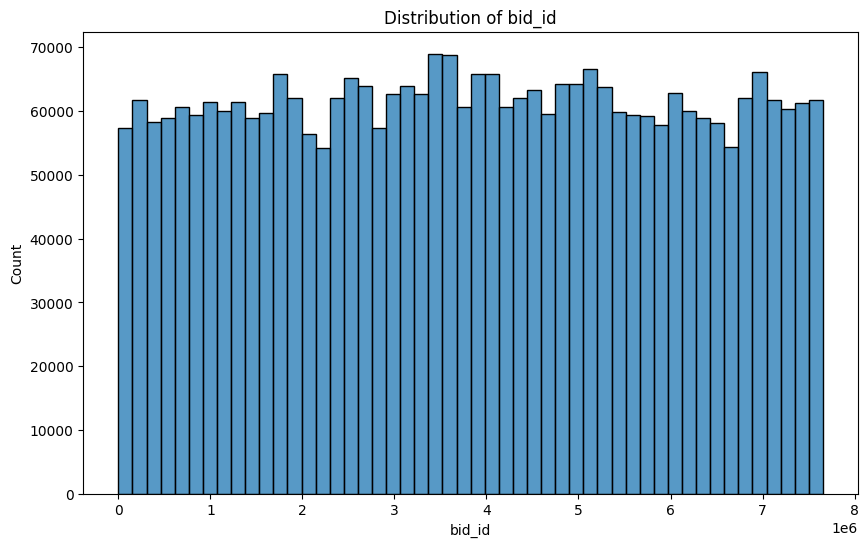

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='bid_id', bins=50, kde=False)
plt.title('Distribution of bid_id')
plt.show()

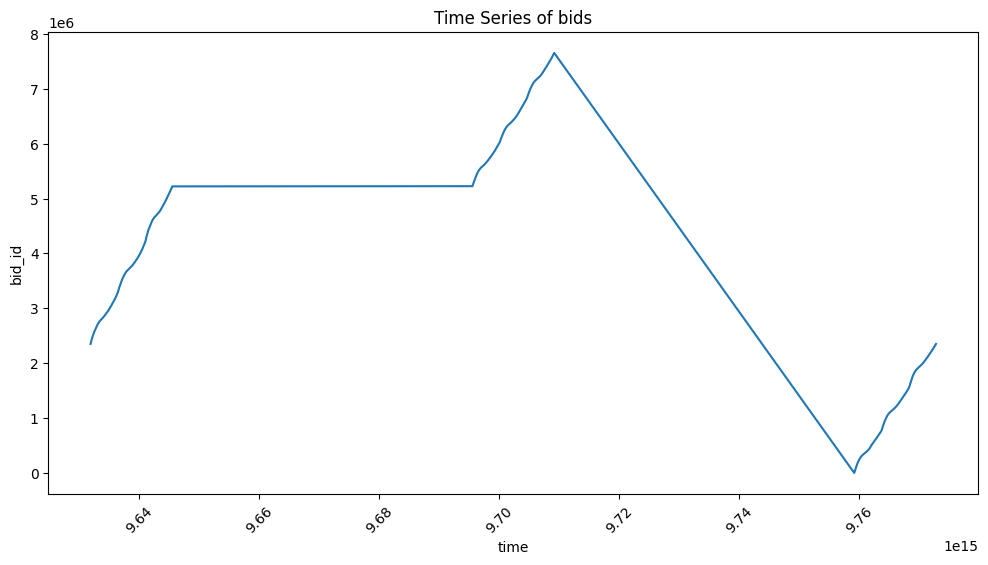

In [ ]:
data_sample = data.sample(frac=0.01)
data_sample.sort_values('time', inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='bid_id', data=data_sample)
plt.title('Time Series of bids')
plt.xticks(rotation=45)
plt.show()


In [ ]:
variables = ['bid_id', 'auction', 'country', 'ip', 'device', 'url']  # Liste des variables
grouped_data = data.groupby(['outcome', 'bidder_id'])
avg_values_per_outcome = {var: grouped_data[var].nunique().groupby('outcome').mean() for var in variables}

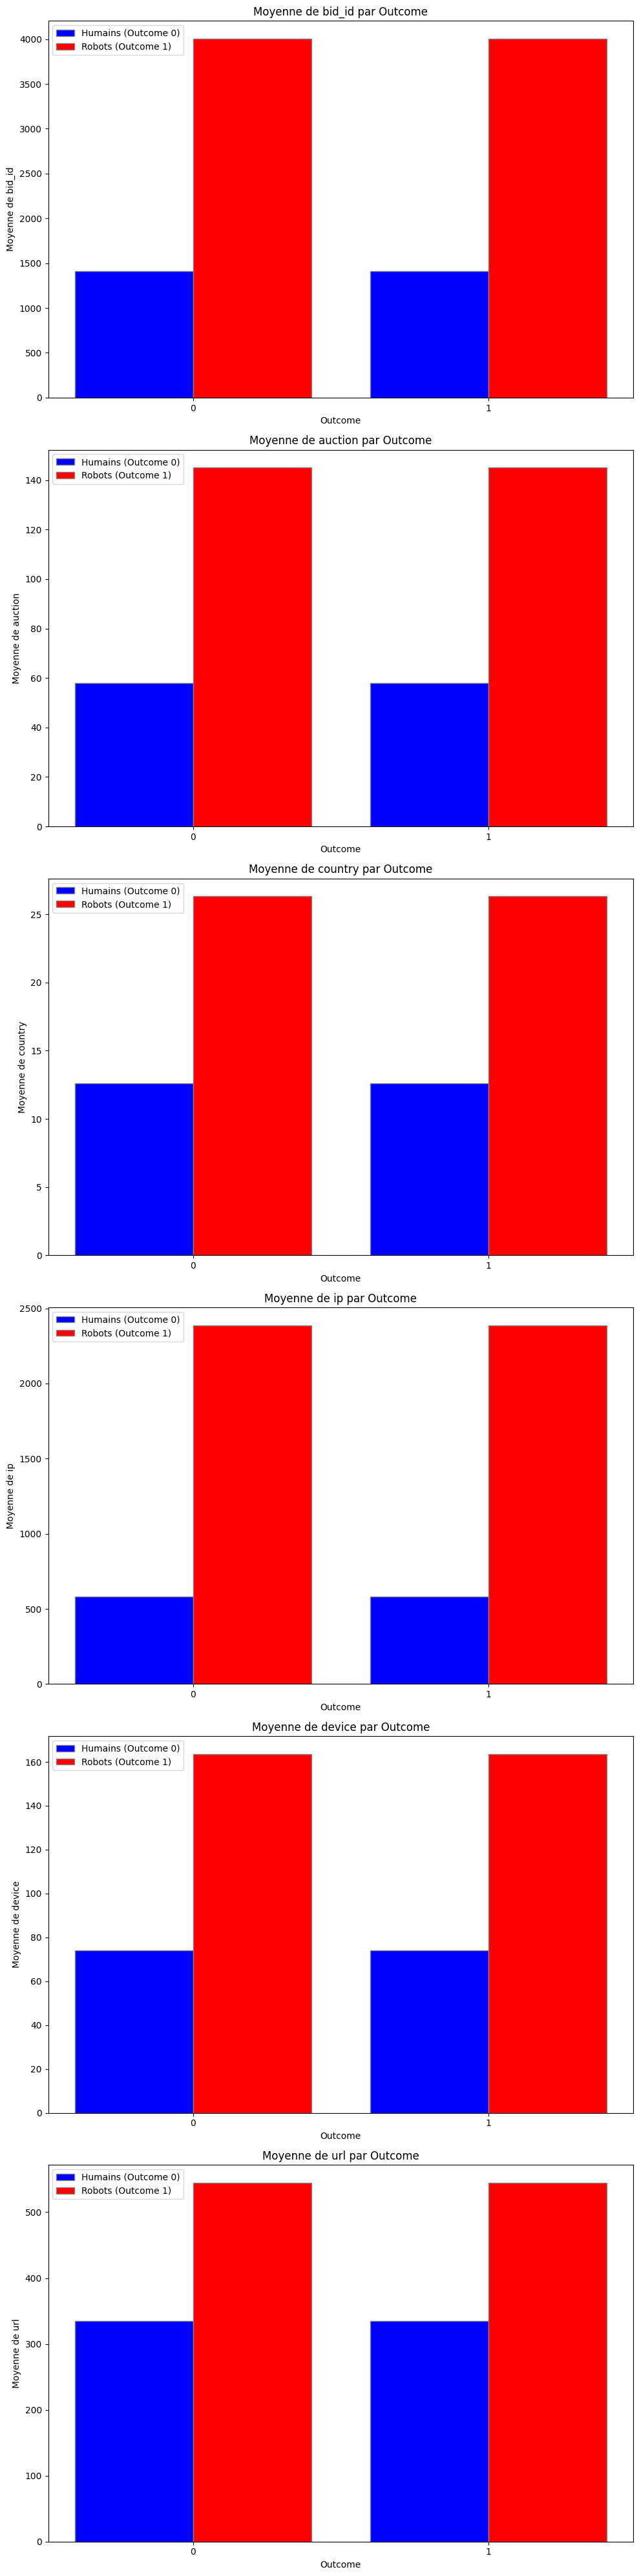

In [ ]:
# Nombre de barres par groupe
n_bars = len(avg_values_per_outcome[variables[0]])

# Position des barres sur l'axe des x
barWidth = 0.4
r1 = range(n_bars)
r2 = [x + barWidth for x in r1]

# Créer les graphiques à barres pour chaque variable
plt.figure(figsize=(10, 40))

for i, var in enumerate(variables):
    plt.subplot(len(variables), 1, i + 1)
    plt.bar(r1, avg_values_per_outcome[var][0], color='blue', width=barWidth, edgecolor='gray', label='Humains (Outcome 0)')
    plt.bar(r2, avg_values_per_outcome[var][1], color='red', width=barWidth, edgecolor='gray', label='Robots (Outcome 1)')
    plt.xlabel('Outcome')
    plt.ylabel(f'Moyenne de {var}')
    plt.title(f'Moyenne de {var} par Outcome')
    plt.xticks([r + barWidth / 2 for r in range(n_bars)], ['0', '1'])
    plt.legend()

plt.tight_layout()
plt.show()


## Analyse de l’Outcome

La visualisation ci-dessous montre la répartition des `outcomes` qui pourraient représenter, par exemple, la classification entre des utilisateurs humains et des robots (`Human vs Robot`). Une grande disparité dans la distribution peut suggérer un déséquilibre de classe, un aspect important à considérer lors de la construction de modèles prédictifs.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

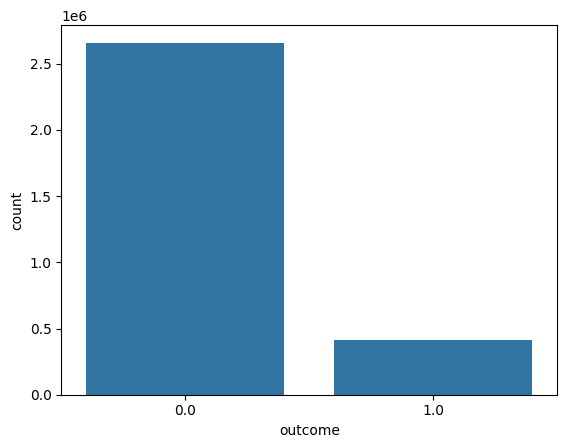

<Figure size 800x400 with 0 Axes>

In [ ]:
sns.countplot(x='outcome', data=data)
plt.figure(figsize = (8,4))
plt.show()

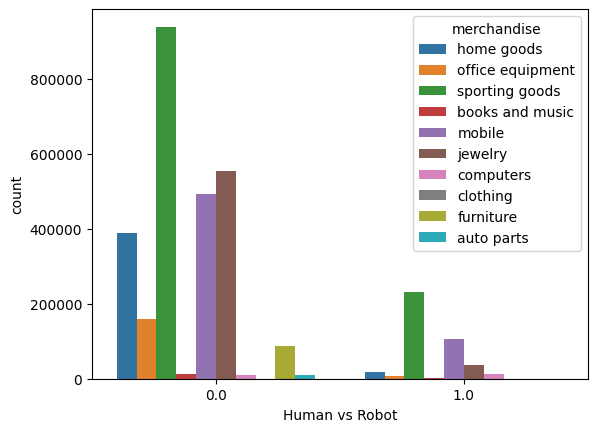

In [ ]:
sns.countplot(x='outcome', data=data, hue='merchandise')
plt.xlabel("Human vs Robot")
plt.show()

**<h1>2. Features engineering</h1>**

Création des nouveaux features



Le snippet suivant introduit une étape d’ingénierie des fonctionnalités (`Features engineering`), cruciale pour améliorer la performance des modèles de machine learning en créant de nouveaux attributs pertinents à partir des données existantes, comme le ratio d’IPs uniques par enchère.

`Proportion d’IPs uniques par enchérisseur` : Indique le nombre d’adresses IP uniques utilisées par chaque enchérisseur, ce qui pourrait révéler des comportements de connexion diversifiés ou des stratégies d’enchères automatisées.

In [ ]:
#Proportion of Unique IPs to Bids Per User:
num_ip_per_bidder = data.groupby('bidder_id')['ip'].nunique() / data.groupby('bidder_id')['bid_id'].nunique()
num_ip_per_bidder = num_ip_per_bidder.to_frame()
train = pd.merge(train, num_ip_per_bidder, on='bidder_id', how='left')

`Total d’URL uniques par utilisateur` : Représente la variété des ressources web que chaque utilisateur a visitées, possiblement reflétant l’étendue de ses intérêts ou de son activité.

In [ ]:
#Total Unique URL Per User:
total_url_per_user = data.groupby('bidder_id')['url'].nunique()
total_url_per_user = total_url_per_user.to_frame()
train = pd.merge(train, total_url_per_user, on='bidder_id', how='left')

`Total d’enchères uniques par utilisateur` : Compte le nombre d’enchères distinctes auxquelles un utilisateur a participé, donnant une mesure de son engagement dans les enchères.

In [ ]:
#Total Unique Auctions Per User:
total_auctions_per_user = data.groupby('bidder_id')['auction'].nunique()
total_auctions_per_user = total_auctions_per_user.to_frame()
train = pd.merge(train, total_auctions_per_user, on='bidder_id', how='left')

In [ ]:
#Proportion of Unique URLs to Bids Per User:
num_url_per_bidder = data.groupby('bidder_id')['url'].nunique() / data.groupby('bidder_id')['bid_id'].nunique()
num_url_per_bidder = num_url_per_bidder.to_frame()
train = pd.merge(train, num_url_per_bidder, on='bidder_id', how='left')


In [ ]:
#Number of Bids Per User:
total_bids_per_user = data.groupby('bidder_id')['bid_id'].size()
total_bids_per_user = total_bids_per_user.to_frame()
train = pd.merge(train, total_bids_per_user, on='bidder_id', how='left')


In [ ]:
#Total Unique IPs Per User:
total_ip_per_user = data.groupby('bidder_id')['ip'].nunique()
total_ip_per_user = total_ip_per_user.to_frame()
train = pd.merge(train, total_ip_per_user, on='bidder_id', how='left')


In [ ]:
#Mean Number of Bids Per User for Each Auction:
mean_bids_per_auction = data.groupby(['bidder_id', 'auction'])['bid_id'].count().groupby('bidder_id').mean()
mean_bids_per_auction = mean_bids_per_auction.to_frame()
train = pd.merge(train, mean_bids_per_auction, on='bidder_id', how='left')


In [ ]:
#Median Number of Bids Per User for Each Auction:
median_bids_per_auction = data.groupby(['bidder_id', 'auction'])['bid_id'].count().groupby('bidder_id').median()
median_bids_per_auction = median_bids_per_auction.to_frame()
train = pd.merge(train, median_bids_per_auction, on='bidder_id', how='left')


In [ ]:
#Average Number of Countries Per User for Each Auction:
avg_country_per_user = data.groupby(['bidder_id', 'auction'])['country'].nunique().groupby('bidder_id').mean()
avg_country_per_user = avg_country_per_user.to_frame()
train = pd.merge(train, avg_country_per_user, on='bidder_id', how='left')


In [ ]:
#Median Number of Countries Per User for Each Auction:
median_country_per_user = data.groupby(['bidder_id', 'auction'])['country'].nunique().groupby('bidder_id').median()
median_country_per_user = median_country_per_user.to_frame()
train = pd.merge(train, median_country_per_user, on='bidder_id', how='left')


In [ ]:
#Mean Number of Auctions Per User for Each Country:
avg_auction_per_country_user = data.groupby(['bidder_id', 'country'])['auction'].count().groupby('bidder_id').mean()
avg_auction_per_country_user = avg_auction_per_country_user.to_frame()
train = pd.merge(train, avg_auction_per_country_user, on='bidder_id', how='left')


In [ ]:
#Median Number of Auctions Per User for Each Country:
median_auction_per_country_user = data.groupby(['bidder_id', 'country'])['auction'].count().groupby('bidder_id').median()
median_auction_per_country_user = median_auction_per_country_user.to_frame()
train = pd.merge(train, median_auction_per_country_user, on='bidder_id', how='left')


In [ ]:
#Mean Number of URLs Per Device Per User:
avg_url_per_device_user = data.groupby(['bidder_id', 'device'])['url'].count().groupby('bidder_id').mean()
avg_url_per_device_user = avg_url_per_device_user.to_frame()
train = pd.merge(train, avg_url_per_device_user, on='bidder_id', how='left')


In [ ]:
#Median Number of URLs Per Device for Each User:
median_url_per_device_user = data.groupby(['bidder_id', 'device'])['url'].count().groupby('bidder_id').median()
median_url_per_device_user = median_url_per_device_user.to_frame()
train = pd.merge(train, median_url_per_device_user, on='bidder_id', how='left')


In [ ]:
#Mean Number of IPs Per Device for Each User:
avg_ip_per_device_user = data.groupby(['bidder_id', 'device'])['ip'].count().groupby('bidder_id').mean()
avg_ip_per_device_user = avg_ip_per_device_user.to_frame()
train = pd.merge(train, avg_ip_per_device_user, on='bidder_id', how='left')


In [ ]:
#Median Number of IPs Per Device for Each User:
median_ip_per_device_user = data.groupby(['bidder_id', 'device'])['ip'].count().groupby('bidder_id').median()
median_ip_per_device_user = median_ip_per_device_user.to_frame()
train = pd.merge(train, median_ip_per_device_user, on='bidder_id', how='left')


In [ ]:
train.columns=['bidder_id', 'payment_account', 'address', 'outcome',
                  'num_ip_per_bidder', 'total_url_per_user', 'total_auctions_per_user', 'num_url_per_bidder', 'total_bids_per_user',
                  'total_ip_per_user', 'mean_bids_per_auction', 'median_bids_per_auction', 'avg_country_per_user',
                  'median_country_per_user', 'avg_auction_per_country_user', 'median_auction_per_country_user',
                  'avg_url_per_device_user', 'median_url_per_device_user', 'avg_ip_per_device_user',
                  'median_ip_per_device_user']

In [ ]:
train = train.dropna()
train['bidder_id'].nunique()

1983

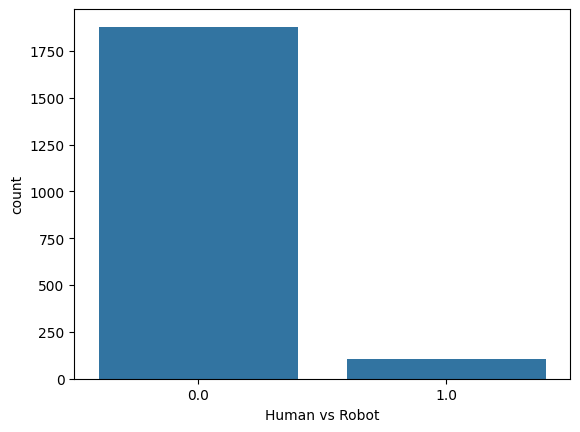

In [ ]:
sns.countplot(x='outcome', data=train)
plt.xlabel("Human vs Robot")
plt.show()

Ce code produit une carte de chaleur des corrélations entre les différentes fonctionnalités numériques du jeu de données. Les couleurs varient du bleu au rouge, indiquant des corrélations négatives à positives. Cette visualisation est essentielle pour détecter des relations potentielles ou des redondances entre les caractéristiques, ce qui peut être crucial pour la sélection des fonctionnalités et la modélisation.

<Axes: >

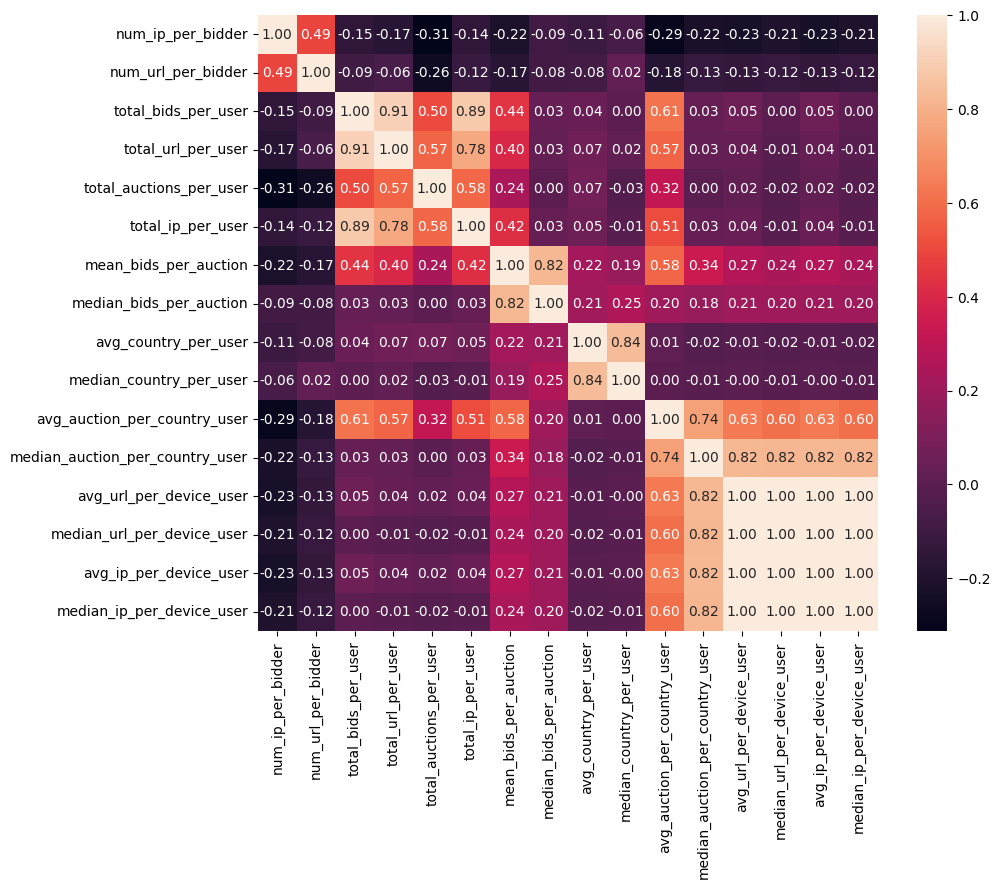

In [ ]:
df = train[['num_ip_per_bidder', 'num_url_per_bidder', 'total_bids_per_user',
            'total_url_per_user', 'total_auctions_per_user', 'total_ip_per_user',
            'mean_bids_per_auction', 'median_bids_per_auction', 'avg_country_per_user',
            'median_country_per_user', 'avg_auction_per_country_user',
            'median_auction_per_country_user', 'avg_url_per_device_user',
            'median_url_per_device_user', 'avg_ip_per_device_user',
            'median_ip_per_device_user']]
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix,xticklabels=corr_matrix.columns,yticklabels=corr_matrix.columns,annot=True, fmt=".2f")

In [ ]:
merchandise = data.pivot_table(index='bidder_id', columns='merchandise', values='bid_id', aggfunc = lambda x: len(x.unique()),fill_value=0)
merchandise = merchandise.reset_index()
merchandise

merchandise,bidder_id,auto parts,books and music,clothing,computers,furniture,home goods,jewelry,mobile,office equipment,sporting goods
0,001068c415025a009fee375a12cff4fcnht8y,0,0,0,0,0,0,1,0,0,0
1,0030a2dd87ad2733e0873062e4f83954mkj86,0,0,0,0,0,0,0,1,0,0
2,00a0517965f18610417ee784a05f494d4dw6e,0,141,0,0,0,0,0,0,0,0
3,00cc97158e6f4cb8eac3c0075918b7ffi5k8o,0,0,0,0,0,0,0,0,3,0
4,01067975436d123f717ee5aba0dd4bbfa0937,0,0,0,0,0,0,543,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1979,ff92ea4abd33ed38601287f0e1d6726dmgx1f,0,0,0,0,0,0,0,0,0,395
1980,ffacbed056cbfaa60c1fcf51f0d381bddr3ly,0,0,0,0,0,0,0,0,0,9
1981,ffaf0a972a6dcb3910fd6b16045781e2ava5y,0,0,0,0,0,0,0,0,0,3
1982,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,0,0,0,0,0,0,0,22,0,0


In [ ]:
df = pd.merge(train, merchandise, on='bidder_id', how='left')
print(df.columns)

Index(['bidder_id', 'payment_account', 'address', 'outcome',
       'num_ip_per_bidder', 'total_url_per_user', 'total_auctions_per_user',
       'num_url_per_bidder', 'total_bids_per_user', 'total_ip_per_user',
       'mean_bids_per_auction', 'median_bids_per_auction',
       'avg_country_per_user', 'median_country_per_user',
       'avg_auction_per_country_user', 'median_auction_per_country_user',
       'avg_url_per_device_user', 'median_url_per_device_user',
       'avg_ip_per_device_user', 'median_ip_per_device_user', 'auto parts',
       'books and music', 'clothing', 'computers', 'furniture', 'home goods',
       'jewelry', 'mobile', 'office equipment', 'sporting goods'],
      dtype='object')


In [ ]:
df=df.drop(columns=['bidder_id', 'payment_account', 'address'])

In [ ]:
df

,outcome,num_ip_per_bidder,total_url_per_user,total_auctions_per_user,num_url_per_bidder,total_bids_per_user,total_ip_per_user,mean_bids_per_auction,median_bids_per_auction,avg_country_per_user,...,auto parts,books and music,clothing,computers,furniture,home goods,jewelry,mobile,office equipment,sporting goods
0,0.0,0.833333,1.0,18.0,0.041667,24.0,20.0,1.333333,1.0,1.166667,...,0,0,0,0,0,24,0,0,0,0
1,0.0,1.000000,2.0,1.0,0.666667,3.0,3.0,3.000000,3.0,1.000000,...,0,0,0,0,0,0,0,0,3,0
2,0.0,1.000000,2.0,4.0,0.500000,4.0,4.0,1.000000,1.0,1.000000,...,0,0,0,0,0,0,0,0,0,4
3,0.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.000000,1.0,1.000000,...,0,1,0,0,0,0,0,0,0,0
4,0.0,0.793548,91.0,23.0,0.587097,155.0,123.0,6.739130,2.0,1.000000,...,0,0,0,0,0,0,0,0,155,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978,0.0,0.138889,2.0,25.0,0.055556,36.0,5.0,1.440000,1.0,1.000000,...,0,0,0,0,0,0,0,36,0,0
1979,0.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.000000,1.0,1.000000,...,0,0,0,0,0,0,0,1,0,0
1980,0.0,1.000000,1.0,1.0,0.500000,2.0,2.0,2.000000,2.0,1.000000,...,0,0,0,0,0,0,0,2,0,0
1981,0.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.000000,1.0,1.000000,...,0,0,0,0,0,0,0,0,1,0


Donc maintenant on laisse la data ( data_balanced pour l'utilisation ulétrieur )

# **<h1>3. Modélisation prédective</h1>**

#### Importation des bibliothèques nécessaires



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt


In [ ]:
df.head() #affiche les premières lignes du dataframe pour vérifier les données.

,outcome,num_ip_per_bidder,total_url_per_user,total_auctions_per_user,num_url_per_bidder,total_bids_per_user,total_ip_per_user,mean_bids_per_auction,median_bids_per_auction,avg_country_per_user,...,auto parts,books and music,clothing,computers,furniture,home goods,jewelry,mobile,office equipment,sporting goods
0,0.0,0.833333,1.0,18.0,0.041667,24.0,20.0,1.333333,1.0,1.166667,...,0,0,0,0,0,24,0,0,0,0
1,0.0,1.000000,2.0,1.0,0.666667,3.0,3.0,3.000000,3.0,1.000000,...,0,0,0,0,0,0,0,0,3,0
2,0.0,1.000000,2.0,4.0,0.500000,4.0,4.0,1.000000,1.0,1.000000,...,0,0,0,0,0,0,0,0,0,4
3,0.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.000000,1.0,1.000000,...,0,1,0,0,0,0,0,0,0,0
4,0.0,0.793548,91.0,23.0,0.587097,155.0,123.0,6.739130,2.0,1.000000,...,0,0,0,0,0,0,0,0,155,0


### Division des données en ensembles d'entraînement et de test


In [ ]:
X = df.drop('outcome', axis=1)  # Features
y = df['outcome']               # Target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Entraînement du modèle de régression logistique
Le modèle de régression logistique est un bon point de départ pour la classification en raison de sa simplicité et de son efficacité. Nous l’entraînons avec les données d’entraînement et nous attendons à ce qu’il converge vers une solution.

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Prédiction et évaluation de la régression logistique
Après l’entraînement, nous utilisons le modèle pour prédire les résultats sur l’ensemble de test. Nous évaluons la précision du modèle, examinons la matrice de confusion pour voir les erreurs de classification, et affichons un rapport de classification détaillé pour comprendre la précision, le rappel et le score F1 pour chaque classe.

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9319899244332494
Confusion Matrix:
 [[368   3]
 [ 24   2]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       371
         1.0       0.40      0.08      0.13        26

    accuracy                           0.93       397
   macro avg       0.67      0.53      0.55       397
weighted avg       0.90      0.93      0.91       397



### Entraînement et évaluation du modèle SVM
Nous répétons un processus similaire avec un modèle SVM, qui peut capturer des relations plus complexes dans les données. Après l’entraînement, nous évaluons sa performance et comparons les résultats avec ceux obtenus à partir de la régression logistique pour déterminer le meilleur modèle.

In [ ]:
svm_model = SVC()

In [ ]:
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = svm_model.predict(X_test)

## Évaluation de la régression logistique
#### Évaluation de la précision du modèle
La précision globale du modèle de régression logistique est calculée pour donner un aperçu de sa performance sur l’ensemble de test. Une précision élevée indique que le modèle prédit correctement une grande proportion de résultats.

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Matrice de confusion
La matrice de confusion est affichée pour visualiser les performances du modèle en termes de prédictions correctes et incorrectes, comparant les prédictions aux valeurs réelles de l’ensemble de test.

In [ ]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9345088161209067
Confusion Matrix:
 [[371   0]
 [ 26   0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.97       371
         1.0       0.00      0.00      0.00        26

    accuracy                           0.93       397
   macro avg       0.47      0.50      0.48       397
weighted avg       0.87      0.93      0.90       397



##Évaluation du modèle Random Forest

#### Entraînement du modèle Random Forest
Un modèle Random Forest est instancié et entraîné avec les données. Les forêts aléatoires sont efficaces pour gérer un grand nombre de features et peuvent capter des relations complexes entre elles.

In [ ]:
random_forest_model = RandomForestClassifier()

In [ ]:
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

#### Prédiction et évaluation
Après l’entraînement, le modèle Random Forest est utilisé pour prédire les résultats sur l’ensemble de test, et sa précision est évaluée. Comme pour la régression logistique, une matrice de confusion et un rapport de classification sont générés pour comprendre en détail les performances du modèle.

In [ ]:
y_pred = random_forest_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9445843828715366
Confusion Matrix:
 [[369   2]
 [ 20   6]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       371
         1.0       0.75      0.23      0.35        26

    accuracy                           0.94       397
   macro avg       0.85      0.61      0.66       397
weighted avg       0.94      0.94      0.93       397



Vue globale sur les trois modèles utilisés : la régression logistique, la machine à vecteurs de support (SVM) et la forêt aléatoire (Random Forest). Chaque modèle est entraîné sur l'ensemble d'entraînement, puis évalué sur l'ensemble de test. Les métriques d'évaluation comprennent la précision, le score F1 et l'aire sous la courbe ROC (AUC). Enfin, la courbe ROC pour chaque modèle, permettant une comparaison visuelle de leurs performances.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


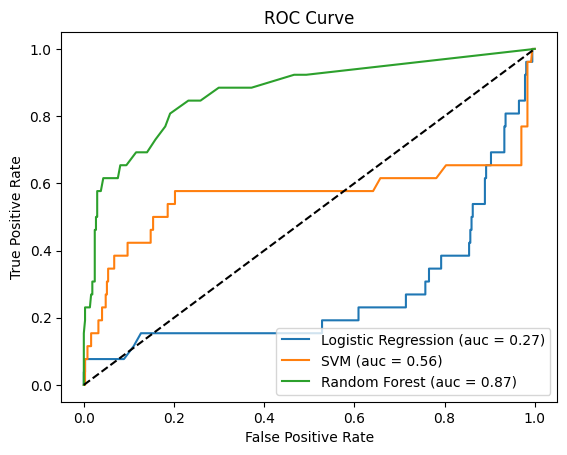

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser les modèles
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier()
}

# Entraîner et évaluer les modèles
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # probabilités pour ROC

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    results[name] = {'accuracy': accuracy, 'f1_score': f1, 'roc_auc': roc_auc}

    # Courbe ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (auc = {roc_auc:.2f})")
# Configurer et afficher la courbe ROC
plt.plot([0, 1], [0, 1], 'k--')  # ligne diagonale pour une performance au hasard
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="best")
plt.show()

In [ ]:
# Afficher les résultats
for name, metrics in results.items():
    print(f"{name} - Accuracy: {metrics['accuracy']:.2f}, F1 Score: {metrics['f1_score']:.2f}, ROC AUC: {metrics['roc_auc']:.2f}")

Logistic Regression - Accuracy: 0.93, F1 Score: 0.13, ROC AUC: 0.27
SVM - Accuracy: 0.93, F1 Score: 0.00, ROC AUC: 0.56
Random Forest - Accuracy: 0.94, F1 Score: 0.35, ROC AUC: 0.87


On remarque que les métrics d'évaluations pour les robots sont assez faible, pour cette raison on essaie d'équilibrer les données avec une technique d'augmentation des données en utilisant le deep learning

In [ ]:
#On commence par importer les donées
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

Le code commence par charger les données en les séparant en caractéristiques (`X`) et étiquettes (`y`). L'étiquette 'outcome' est stockée dans `y` et les caractéristiques sont stockées dans `X`.


In [ ]:
# Pré-traitement des données
data = df.values
X = data[:, 1:]  # Exclure la colonne 'outcome'
y = data[:, 0]   # 'outcome'

Les caractéristiques `X` sont normalisées à l'aide de `MinMaxScaler` de `scikit-learn` pour que toutes les valeurs soient entre 0 et 1. Cela aide à la convergence pendant l'entraînement du réseau de neurones.


In [ ]:
# Normaliser les caractéristiques
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

On filtre ensuite les données pour obtenir uniquement celles correspondant à la classe minoritaire (lorsque `y == 1`) et stocke les dimensions d'entrée nécessaires pour le modèle.


In [ ]:
# Séparer les données de la classe minoritaire
minority_data = X_scaled[y == 1]
# Dimensions
input_dim = minority_data.shape[1]

Un modèle séquentiel `Sequential()` est créé en tant que générateur avec plusieurs couches `Dense`. La première couche utilise l'activation 'relu' et les couches suivantes utilisent 'tanh' et 'sigmoid'. Il est noté de remplacer 'tanh' par 'sigmoid' pour la dernière couche.


In [ ]:
# Créer le générateur
generator = Sequential()
generator.add(Dense(units=64, activation='relu', input_dim=input_dim))
generator.add(Dense(units=input_dim, activation='tanh'))
generator.add(Dense(units=input_dim, activation='sigmoid'))  # Utiliser 'sigmoid' au lieu de 'tanh'

Un autre modèle séquentiel est créé pour le discriminateur avec des couches `Dense` utilisant 'relu' et 'sigmoid' comme fonctions d'activation. Le discriminateur est compilé avec la fonction de perte `binary_crossentropy` et l'optimiseur 'adam'.

In [ ]:
# Créer le discriminateur
discriminator = Sequential()
discriminator.add(Dense(units=64, activation='relu', input_dim=input_dim))
discriminator.add(Dense(units=1, activation='sigmoid'))

Le générateur et le discriminateur sont combinés pour former le GAN. Le modèle combiné est compilé avec la même fonction de perte et optimiseur que le discriminateur.


In [ ]:
# Compiler le modèle
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False

In [ ]:
# Chaîner le générateur et le discriminateur
gan = Sequential()
gan.add(generator)
gan.add(discriminator)
gan.compile(loss='binary_crossentropy', optimizer='adam')

Une fonction `train_gan` est définie pour entraîner le GAN. Elle génère du bruit, utilise le générateur pour créer de nouvelles données, prépare les étiquettes, et entraîne alternativement le discriminateur et le générateur. La fonction est ensuite appelée avec un nombre spécifié d'époques et une taille de lot.


In [ ]:
# Entraîner le GAN
def train_gan(epochs, batch_size):
    for epoch in range(epochs):
        # Générer de nouvelles données
        noise = np.random.normal(0, 1, (batch_size, input_dim))
        gen_data = generator.predict(noise)
        # Préparer les étiquettes pour l'entraînement du discriminateur
        real_data = minority_data[np.random.randint(0, minority_data.shape[0], batch_size)]
        x_combined = np.concatenate((real_data, gen_data))
        y_combined = np.concatenate((np.ones(batch_size), np.zeros(batch_size)))

        # Entraîner le discriminateur
        discriminator.trainable = True
        discriminator.train_on_batch(x_combined, y_combined)

        # Entraîner le générateur
        noise = np.random.normal(0, 1, (batch_size, input_dim))
        discriminator.trainable = False
        gan.train_on_batch(noise, np.ones(batch_size))
# Appeler la fonction d'entraînement
train_gan(epochs=1000, batch_size=32)

1/1 [==============================] - 0s 22ms/step


On génère de nouvelles données en utilisant un modèle de générateur. Les données générées sont ensuite re-mises à l'échelle pour correspondre à l'échelle d'origine des données.


In [ ]:
# Générer de nouvelles données
noise = np.random.normal(0, 1, (1000, input_dim))  # Générer plus de données selon vos besoins
new_data = generator.predict(noise)
new_data_rescaled = scaler.inverse_transform(new_data)

32/32 [==============================] - 0s 1ms/step


In [ ]:
new_data

array([[6.8441433e-01, 2.6431484e-03, 6.7342646e-02, ..., 1.3795131e-02,
        3.9316987e-04, 6.1485393e-04],
       [6.8389684e-01, 2.6414935e-03, 6.8060562e-02, ..., 1.3845967e-02,
        3.9668204e-04, 6.2334648e-04],
       [6.7624468e-01, 2.7827029e-03, 6.8351120e-02, ..., 1.3816139e-02,
        4.1818156e-04, 6.2910770e-04],
       ...,
       [6.8078172e-01, 2.7673733e-03, 6.9646746e-02, ..., 1.4144692e-02,
        4.1184810e-04, 6.5609644e-04],
       [6.8504578e-01, 2.6128625e-03, 6.7819960e-02, ..., 1.3783082e-02,
        3.9168095e-04, 6.1786990e-04],
       [6.8637592e-01, 2.5910090e-03, 6.7545101e-02, ..., 1.3731629e-02,
        3.8477525e-04, 6.1050069e-04]], dtype=float32)

In [ ]:
new_data_df = pd.DataFrame(new_data_rescaled, columns=df.columns[1:])  # Exclure 'outcome'
# Ajouter la colonne 'outcome' avec la valeur 1
new_data_df['outcome'] = 1
# Concaténer avec l'ensemble de données original
augmented_df = pd.concat([df, new_data_df], ignore_index=True)

In [ ]:
augmented_df

,outcome,num_ip_per_bidder,total_url_per_user,total_auctions_per_user,num_url_per_bidder,total_bids_per_user,total_ip_per_user,mean_bids_per_auction,median_bids_per_auction,avg_country_per_user,...,auto parts,books and music,clothing,computers,furniture,home goods,jewelry,mobile,office equipment,sporting goods
0,0.0,0.833333,1.000000,18.000000,0.041667,24.000000,20.000000,1.333333,1.000000,1.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000000,2.000000,1.000000,0.666667,3.000000,3.000000,3.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
2,0.0,1.000000,2.000000,4.000000,0.500000,4.000000,4.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
3,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.793548,91.000000,23.000000,0.587097,155.000000,123.000000,6.739130,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,155.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,1.0,0.684567,215.302948,111.125717,0.026310,722.328613,243.410599,5.043473,4.069190,0.831704,...,1.143531,2.486127,0.035266,4295.318848,40.147362,300.265106,93.260513,664.042969,21.583523,320.814850
2979,1.0,0.678739,227.481094,110.378487,0.026745,739.523743,262.212738,5.249444,4.213940,0.834769,...,1.250768,2.654356,0.037310,4256.434082,42.458828,308.657257,100.146370,675.174927,22.434736,337.492889
2980,1.0,0.680862,226.195007,113.967018,0.026475,762.290894,249.259506,5.199658,4.141932,0.838590,...,1.217478,2.600522,0.037510,4320.395996,41.953045,314.205963,98.391068,679.199829,22.646292,337.911316
2981,1.0,0.685125,213.621689,111.003975,0.026291,720.160706,242.537918,5.043663,4.067710,0.830284,...,1.140073,2.464620,0.035257,4289.105957,39.975243,298.165985,92.705536,661.836060,21.537361,318.223389


In [ ]:
X = augmented_df.drop('outcome', axis=1)  # Features
y = augmented_df['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialiser les modèles
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier()
}

Entraînement des modèles de classification, calcule et stocke leurs performances (précision, score F1, et AUC-ROC), et puis traçage la courbe ROC pour chaque modèle.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


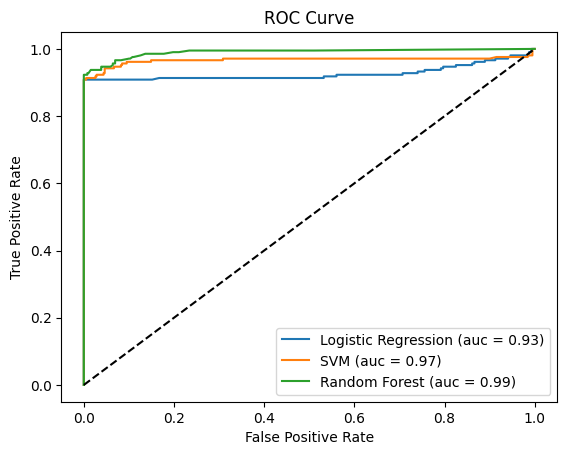

In [ ]:
# Entraîner et évaluer les modèles
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] # probabilités pour ROC
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    results[name] = {'accuracy': accuracy, 'f1_score': f1, 'roc_auc': roc_auc}
    # Courbe ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (auc = {roc_auc:.2f})")
# Configurer et afficher la courbe ROC
plt.plot([0, 1], [0, 1], 'k--')  # ligne diagonale pour une performance au hasard
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="best")
plt.show()

In [ ]:
# Afficher les résultats
for name, metrics in results.items():
    print(f"{name} - Accuracy: {metrics['accuracy']:.2f}, F1 Score: {metrics['f1_score']:.2f}, ROC AUC: {metrics['roc_auc']:.2f}")


Logistic Regression - Accuracy: 0.96, F1 Score: 0.95, ROC AUC: 0.93
SVM - Accuracy: 0.97, F1 Score: 0.95, ROC AUC: 0.97
Random Forest - Accuracy: 0.97, F1 Score: 0.95, ROC AUC: 0.99


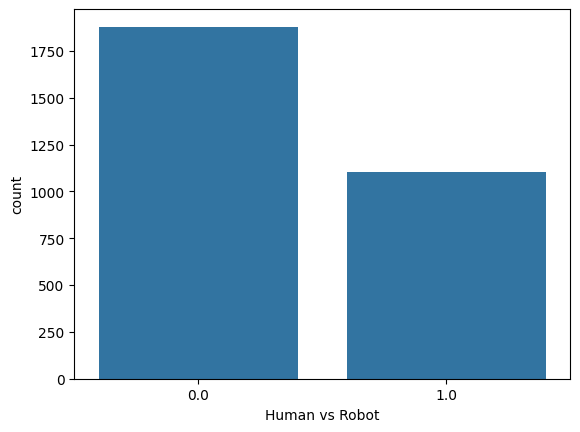

In [ ]:
sns.countplot(x='outcome', data=augmented_df)
plt.xlabel("Human vs Robot")
plt.show()